In [ ]:
#Import the necessary libraries

In [18]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.sm_exceptions import InterpolationWarning



In [19]:
df1 = pd.read_csv('logins.csv')
df2 = pd.read_csv('predict_submissions.csv')
df3 = pd.read_csv('programmes.csv')
df4 = pd.read_csv('sprints.csv')
df5 = pd.read_csv('students.csv')

#Calling the first five rows in the datasets

In [27]:
df1.head()

,student_id,login_date,duration
0,6780,2022-07-23 00:00:21,86326
1,6780,2022-07-25 00:00:49,86320
2,6780,2022-07-21 00:02:09,82017
3,6780,2022-07-29 00:11:42,77879
4,6780,2022-07-27 00:00:28,77791


In [28]:
df2.head()

,student_id,programme_id,sprint_id,grade,complete_date,due_date
0,163,102,15,100.00,2022-03-23 11:13:00,2022-03-25
1,163,102,17,100.00,2022-04-29 23:17:00,2022-09-08
2,163,102,4,53.57,2022-02-07 23:46:00,2022-09-08
3,163,102,2,78.60,2022-05-26 23:57:00,2022-07-08
4,163,102,1,75.70,2022-06-30 20:55:00,2022-08-31


In [8]:
df3.head()

,programme_id,cohort,intake,study_mode,course
0,102,2201FT Data Science,2201.0,FT,Data Science
1,105,2201PT Data Engineering,2201.0,PT,Data Engineering
2,117,2207FT Data Science,2207.0,FT,Data Science
3,118,2207AC Data Science,2207.0,AC,Data Science
4,121,2207AC Data Engineering,2207.0,AC,Data Engineering


In [9]:
df4.head()

,sprint_id,sprint_name
0,1,Advanced Classification
1,2,Advanced Regression
2,3,Aws Cloud Foundations
3,4,Data Visualisation
4,5,Deep Learning


In [10]:
df5.head()

,student_id,first_name,surname,email,status
0,163,268383b882,0e28ad3dfe,d59fb3a8dc,Active
1,170,3f61e153eb,b4a78c496d,d968c59334,Active
2,408,2a8b0bf641,df9eedeb50,92570705bd,Active
3,1457,cdf4696bed,511b1925fc,1509f9431d,Active
4,1521,9375249ffa,66f3879310,e1c67d3bd8,Active


#Checking for the informations in the dataset

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   student_id  160616 non-null  int64 
 1   login_date  160616 non-null  object
 2   duration    160616 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.7+ MB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            8694 non-null   int64  
 1   programme_id          8694 non-null   int64  
 2   sprint_id             8694 non-null   int64  
 3   grade                 8694 non-null   float64
 4   complete_date         8694 non-null   object 
 5   due_date              8694 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 407.7+ KB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   programme_id  19 non-null     int64  
 1   cohort        19 non-null     object 
 2   intake        16 non-null     float64
 3   study_mode    16 non-null     object 
 4   course        19 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 892.0+ bytes


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sprint_id    29 non-null     int64 
 1   sprint_name  29 non-null     object
dtypes: int64(1), object(1)
memory usage: 596.0+ bytes


In [15]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  1473 non-null   int64 
 1   first_name  1451 non-null   object
 2   surname     1473 non-null   object
 3   email       1473 non-null   object
 4   status      1473 non-null   object
dtypes: int64(1), object(4)
memory usage: 57.7+ KB


#Getting the statistical calculations of the datasets

In [16]:
df1.describe()

,student_id,duration
count,160616.000000,160616.000000
mean,6439.952427,3311.107766
std,659.316150,5458.476234
min,163.000000,0.000000
25%,6099.000000,0.000000
50%,6449.000000,642.500000
75%,6889.000000,4531.000000
max,7870.000000,86326.000000


In [17]:
df2.describe()

,student_id,programme_id,sprint_id,grade
count,8694.000000,8694.000000,8694.000000,8694.000000
mean,6480.428801,110.989648,12.657695,40.230523
std,685.851435,7.729130,9.700634,42.301952
min,163.000000,102.000000,1.000000,0.000000
25%,6159.000000,103.000000,2.000000,0.000000
50%,6507.000000,108.000000,15.000000,0.000000
75%,6908.000000,118.000000,17.000000,83.700000
max,7870.000000,125.000000,28.000000,110.000000


In [18]:
df3.describe()

,programme_id,intake
count,19.000000,16.000000
mean,114.684211,2204.437500
std,7.789256,3.224257
min,102.000000,2201.000000
25%,107.500000,2201.000000
50%,116.000000,2204.000000
75%,120.500000,2207.000000
max,126.000000,2210.000000


In [19]:
df4.describe()

,sprint_id
count,29.000000
mean,15.000000
std,8.514693
min,1.000000
25%,8.000000
50%,15.000000
75%,22.000000
max,29.000000


In [20]:
df5.describe()

,student_id
count,1473.000000
mean,6514.924644
std,668.614159
min,163.000000
25%,6167.000000
50%,6559.000000
75%,6957.000000
max,7870.000000


In [8]:
df1.columns

Index(['student_id', 'login_date', 'duration'], dtype='object')

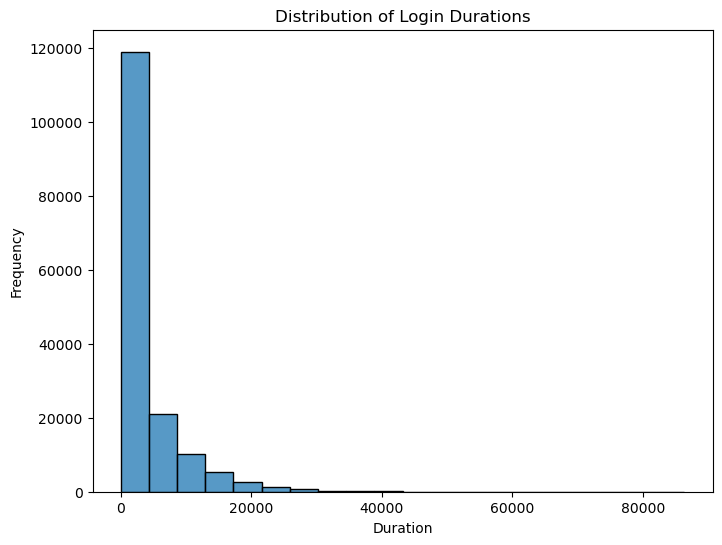

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['duration'], bins=20)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Login Durations')
plt.show()

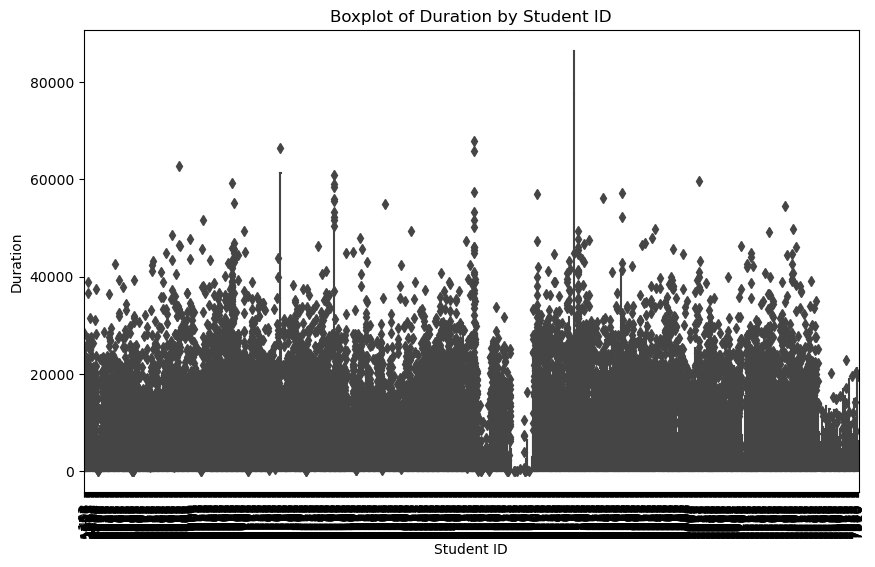

In [14]:
# Create a boxplot for 'duration' grouped by 'student_id'
plt.figure(figsize=(10, 6))
sns.boxplot(x='student_id', y='duration', data=df1)
plt.xlabel('Student ID')
plt.ylabel('Duration')
plt.title('Boxplot of Duration by Student ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [16]:
df1.isnull().sum()

student_id    0
login_date    0
duration      0
dtype: int64

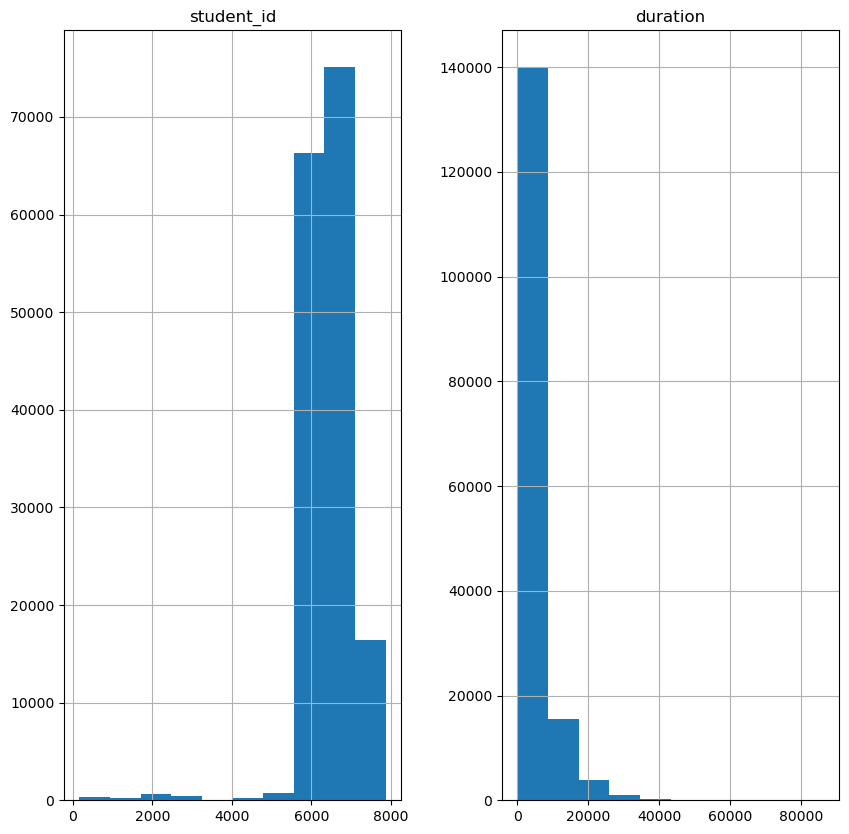

In [20]:
features = ['student_id','duration'] # create a list of all numerical features
df1[features].hist(figsize=(10,10));

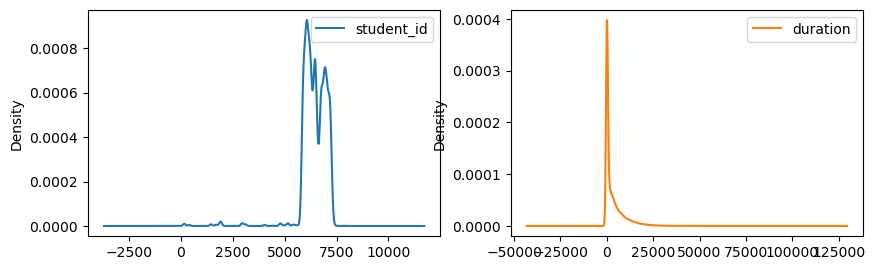

In [21]:
#density plots
df1[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

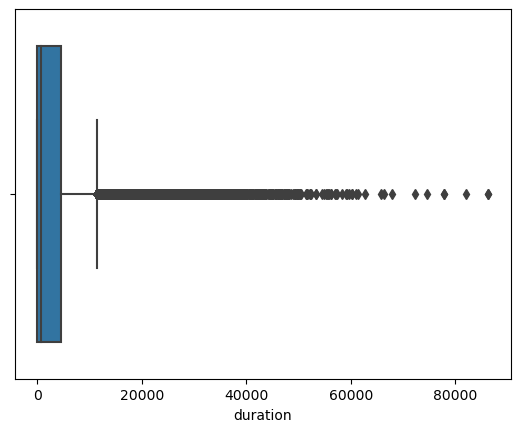

In [22]:
sns.boxplot(x='duration', data=df1);

In [30]:
df1 = df1[['student_id','login_date','duration']]
df1.head()

,student_id,login_date,duration
0,6780,2022-07-23 00:00:21,86326
1,6780,2022-07-25 00:00:49,86320
2,6780,2022-07-21 00:02:09,82017
3,6780,2022-07-29 00:11:42,77879
4,6780,2022-07-27 00:00:28,77791


In [42]:
# Datetime conversion
df1['login_date'] = pd.to_datetime(df1['login_date'])

# Feature engineering
df1['year'] = df1['login_date'].dt.year
df1['month'] = df1['login_date'].dt.month
df1['day'] = df1['login_date'].dt.day
df1['day_of_week'] = df1['login_date'].dt.dayofweek

# Splitting the data into training and testing sets
X = df1[['student_id', 'year', 'month', 'day', 'day_of_week']]  # Features
y = df1['duration']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3709.451020075856


In [43]:
predictions = model.predict(X_train)
mae = mean_absolute_error(y_train, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3750.045772871348


In [54]:
from sklearn import metrics

#since i have already trained a model and generated predictions on the test data
#let's evaluate the model using R-squared on the test data
r_squared = metrics.r2_score(y_test, gen_y)
print('R-squared:', r_squared)

R-squared: 0.013434678980322134


In [55]:

# Convert the 'login_date' column to a datetime object
df1['login_date'] = pd.to_datetime(df1['login_date'])

# Set the 'login_date' column as the index
df1.set_index('login_date', inplace=True)

# Resample the data to a daily frequency and handle missing values
df1 = df1.resample('D').sum()

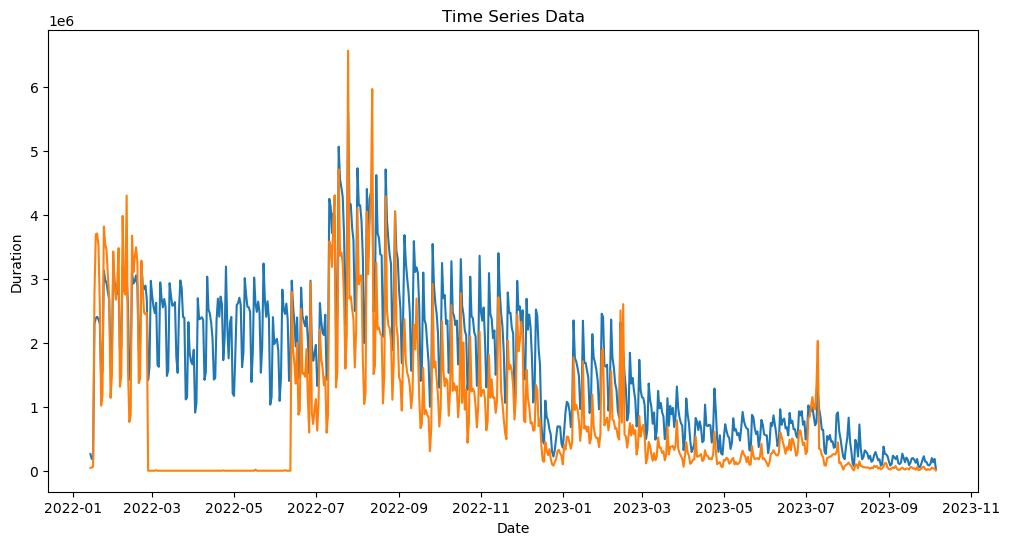

In [57]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df1)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.show()

In [60]:
# Check for stationarity using the Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    
test_stationarity(df1['duration'])

ADF Statistic: -2.7000082974512205
p-value: 0.0740368332291028
Critical Values:
1%: -3.4410277306083668
5%: -2.8662510413264357
10%: -2.569278890210853


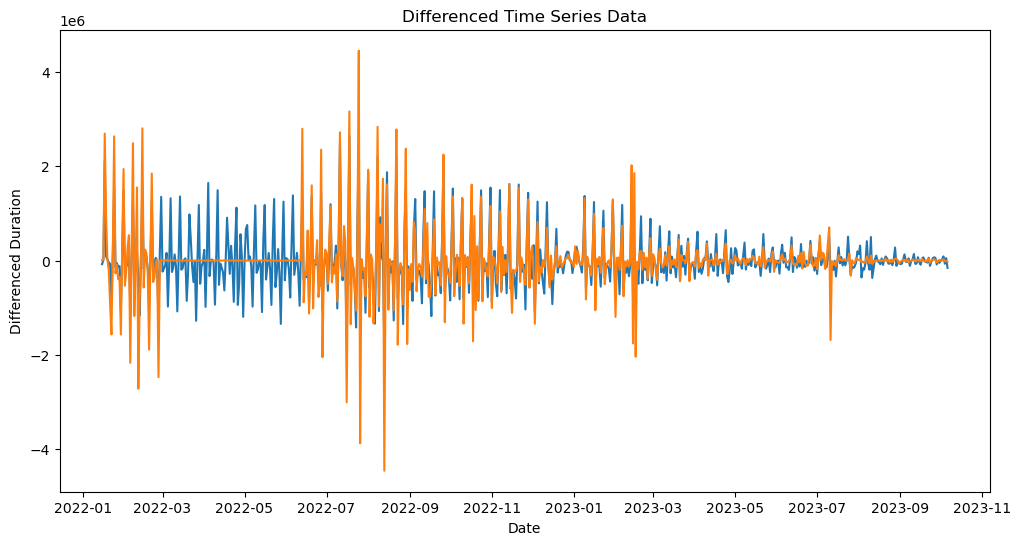

In [63]:
# Differencing to make the data stationary
df1_diff = df1.diff().dropna()

# Visualize the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df1_diff)
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Differenced Duration')
plt.show()


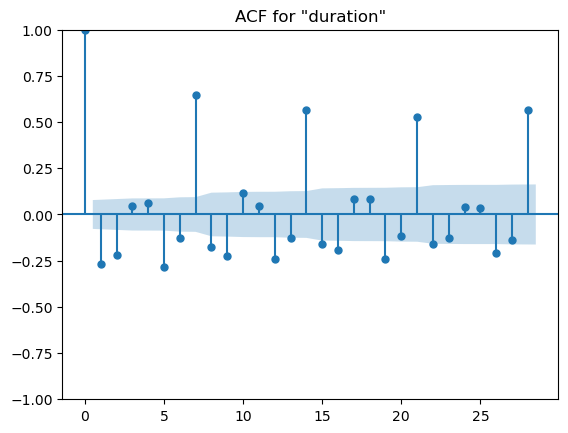

In [65]:
# Assuming 'duration' is the column you want to analyze
column_to_analyze = df1_diff['duration']

# Plot ACF for the selected column
plot_acf(column_to_analyze)
plt.title('ACF for "duration"')
plt.show()